In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_id = r'C:\Users\Omar_Atif\Desktop\jupyter python\50_Startups.csv'
url = file_id

In [3]:
data = pd.read_csv(url)
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
data['State'] = data['State'].astype('category')
print(data)

    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   R&D Spend        50 non-null     float64 
 1   Administration   50 non-null     float64 
 2   Marketing Spend  50 non-null     float64 
 3   State            50 non-null     category
 4   Profit           50 non-null     float64 
dtypes: category(1), float64(4)
memory usage: 1.9 KB


In [29]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


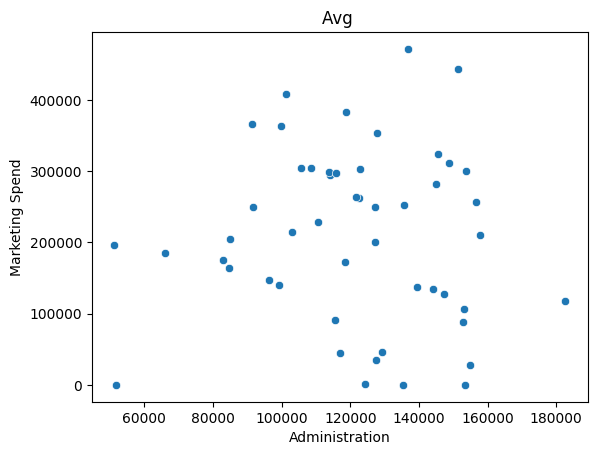

Administration
51283.14     197029.42
51743.15          0.00
65947.93     185265.10
82982.09     174999.30
84710.77     164470.71
85047.44     205517.64
91391.77     366168.42
91790.61     249744.55
96189.63     148001.11
99281.34     140574.81
99814.71     362861.36
101145.55    407934.54
103057.49    214634.81
105751.03    304768.73
108679.17    304981.62
110594.11    229160.95
113867.30    298664.47
114175.79    294919.57
115641.28     91131.24
115816.21    297114.46
116983.80     45173.06
118546.05    172795.67
118671.85    383199.62
121597.55    264346.06
122616.84    261776.23
122782.75    303319.26
124153.04      1903.93
127056.21    201126.82
127320.38    249839.44
127382.30     35534.17
127864.55    353183.81
129219.61     46085.25
135426.92         0.00
135495.07    252664.93
136897.80    471784.10
139553.16    137962.62
144135.98    134050.07
145077.58    282574.31
145530.06    323876.68
147198.87    127716.82
148718.95    311613.29
151377.59    443898.53
152701.92     88218

In [10]:
sns.scatterplot(x='Administration', y='Marketing Spend', data=data)
plt.title('Avg ')
plt.show()
age_avg_time = data.groupby('Administration')['Marketing Spend'].mean()
print(age_avg_time)

# Linear regression

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
import pandas as pd
X = data.drop('Profit', axis=1)
y = data['Profit']
X_encoded = pd.get_dummies(X, columns=['State'], drop_first=True)

In [17]:
# Test , Train
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [18]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
# Get coefficients
coefficients = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Coefficient': regressor.coef_
})

print(coefficients)
print("Intercept:", regressor.intercept_)

           Feature  Coefficient
0        R&D Spend     0.805630
1   Administration    -0.068788
2  Marketing Spend     0.029855
3    State_Florida   938.793006
4   State_New York     6.987760
Intercept: 54028.03959364583


In [26]:
# 5. Make predictions (NOW model is defined)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [27]:
# 6. Evaluate
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))

Train R²: 0.9537019995248526
Test R²: 0.8987266414328636


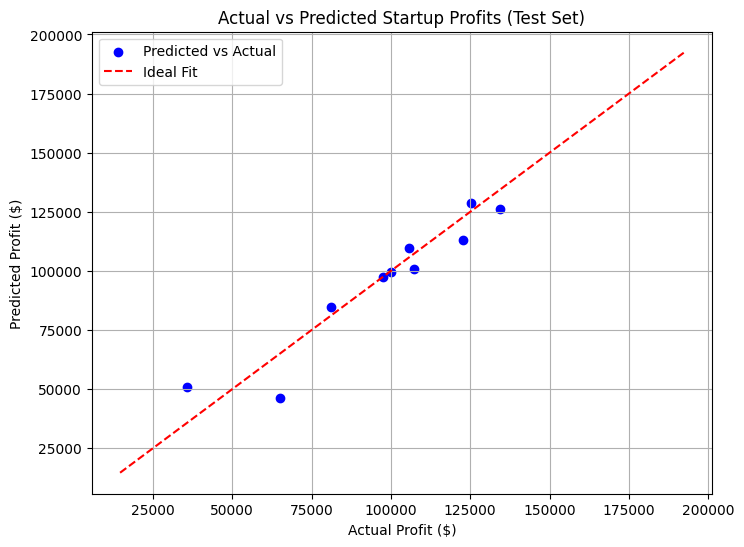

In [28]:
# 7. Visualization - Actual vs Predicted PROFIT (corrected for your dataset)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Profit ($)')  # Changed from 'Sales' to 'Profit'
plt.ylabel('Predicted Profit ($)')  # Changed from 'Sales' to 'Profit'
plt.title('Actual vs Predicted Startup Profits (Test Set)')  # Updated title
plt.legend()
plt.grid(True)
plt.show()